In [1]:
import typing as tp

import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt

In [2]:
def generate_trajectories(
        phi: tp.Callable[[float], float],
        lambd: float,
        N: int,
        t_max: float,
        n_sampling_points: int=1000,
        n_trajectories: int=1000
    ) -> np.ndarray:
    time_ticks = np.linspace(0, t_max, n_sampling_points)
    queue_length_history = np.zeros((n_trajectories, n_sampling_points))
    for i in range(1, time_ticks.shape[0]):
        t = time_ticks[i]
        dt = time_ticks[i] - time_ticks[i-1]
        p_appear = 1 - np.exp(-phi(t) * dt)
        p_leave = 1 - np.exp(-lambd * dt)
        appeared = sps.bernoulli(p_appear).rvs(n_trajectories)
        left = sps.bernoulli(p_leave).rvs(n_trajectories)
        queue_length_history[:, i] = np.clip(queue_length_history[:, i-1] + appeared - left, 0, N)
    return queue_length_history

### $\varphi (t) = t$

In [3]:
def phi(t: float) -> float:
    return t

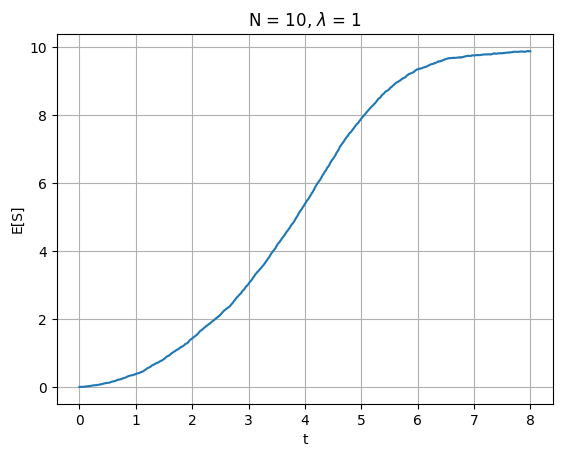

In [4]:
lambd = 1
N = 10
t_max = 8

trajectories = generate_trajectories(phi, lambd, N, t_max)
plt.plot(np.linspace(0, t_max, trajectories.shape[1]), trajectories.mean(axis=0))
plt.title('N = 10, $\lambda$ = 1')
plt.xlabel('t')
plt.ylabel('E[S]')
plt.grid()
plt.savefig('t_10_1.png')

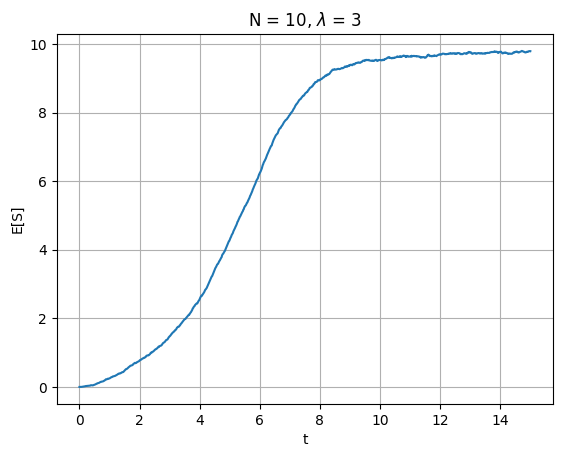

In [5]:
lambd = 3
N = 10
t_max = 15

trajectories = generate_trajectories(phi, lambd, N, t_max)
plt.plot(np.linspace(0, t_max, trajectories.shape[1]), trajectories.mean(axis=0))
plt.title('N = 10, $\lambda$ = 3')
plt.xlabel('t')
plt.ylabel('E[S]')
plt.grid()
plt.savefig('t_10_3.png')

### $\varphi (t) = t^2$

In [6]:
def phi(t: float) -> float:
    return t**2

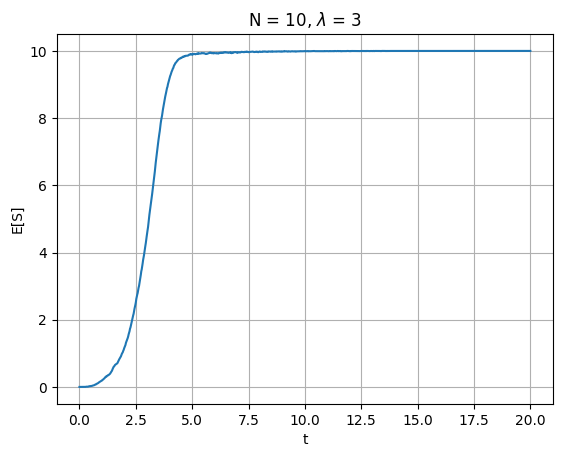

In [7]:
lambd = 3
N = 10
t_max = 20

trajectories = generate_trajectories(phi, lambd, N, t_max)
plt.plot(np.linspace(0, t_max, trajectories.shape[1]), trajectories.mean(axis=0))
plt.title('N = 10, $\lambda$ = 3')
plt.xlabel('t')
plt.ylabel('E[S]')
plt.grid()
plt.savefig('t^2_10_3.png')

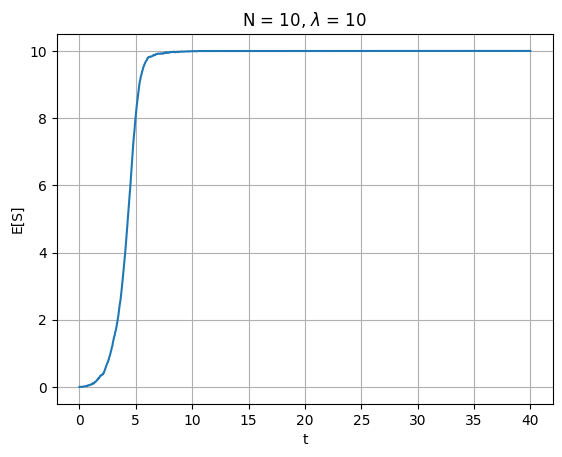

In [8]:
lambd = 10
N = 10
t_max = 40

trajectories = generate_trajectories(phi, lambd, N, t_max)
plt.plot(np.linspace(0, t_max, trajectories.shape[1]), trajectories.mean(axis=0))
plt.title('N = 10, $\lambda$ = 10')
plt.xlabel('t')
plt.ylabel('E[S]')
plt.grid()
plt.savefig('t^2_10_10.png')

### $\varphi (t) = e^t$

In [9]:
def phi(t: float) -> float:
    return np.exp(t)

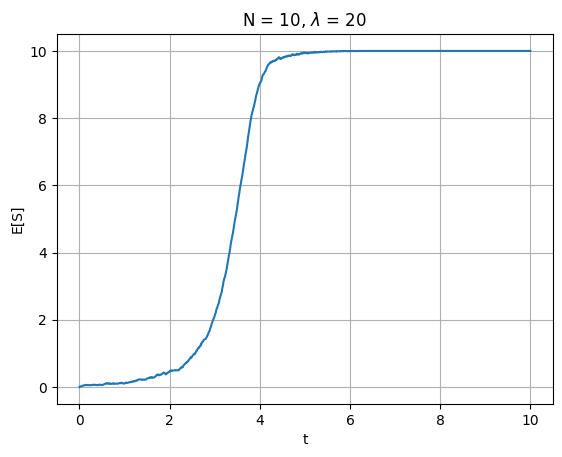

In [10]:
lambd = 20
N = 10
t_max = 10

trajectories = generate_trajectories(phi, lambd, N, t_max)
plt.plot(np.linspace(0, t_max, trajectories.shape[1]), trajectories.mean(axis=0))
plt.title('N = 10, $\lambda$ = 20')
plt.xlabel('t')
plt.ylabel('E[S]')
plt.grid()
plt.savefig('e^t_10_20.png')